<a href="https://colab.research.google.com/github/Wolfasaurus-08/DI_Bootcamp/blob/main/Wk3_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# prompt: upload exel file and create copy to manipulate, print first few frames US Superstore data.xls
file_path = 'US Superstore data.xls'
store_data = pd.read_excel(file_path)

# Create a copy of the data for manipulation
data_copy = store_data.copy()

# Print the first few rows of the DataFrame
print(data_copy.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [5]:
print(data_copy.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
duplicates = data_copy[data_copy.duplicated()]

# Print the duplicate rows, if any
if not duplicates.empty:
  print("Duplicate Rows:")
  print(duplicates)
else:
  print("No duplicate rows found.")

No duplicate rows found.


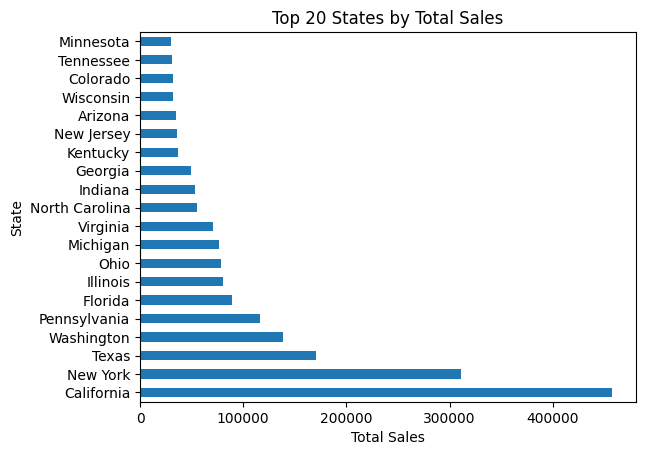

In [7]:
# Which states have the most sales?

top_states_sales = data_copy.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)

top_states_sales.plot.barh()

plt.title('Top 20 States by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')

plt.show()

In [8]:
#What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
df_cal = data_copy[data_copy['State'] == 'California']
df_new = data_copy[data_copy['State'] == 'New York']

Gap = df_cal['Profit'].sum() - df_new['Profit'].sum()

print (f'the difference is {Gap} to California')

the difference is 2342.838499999998 to California


In [9]:
outstanding_customer = data_copy[data_copy['State'] == 'New York'].groupby('Customer Name')['Sales'].sum().idxmax()
print(f"Outstanding customer in New York: {outstanding_customer}")

Outstanding customer in New York: Tom Ashbrook


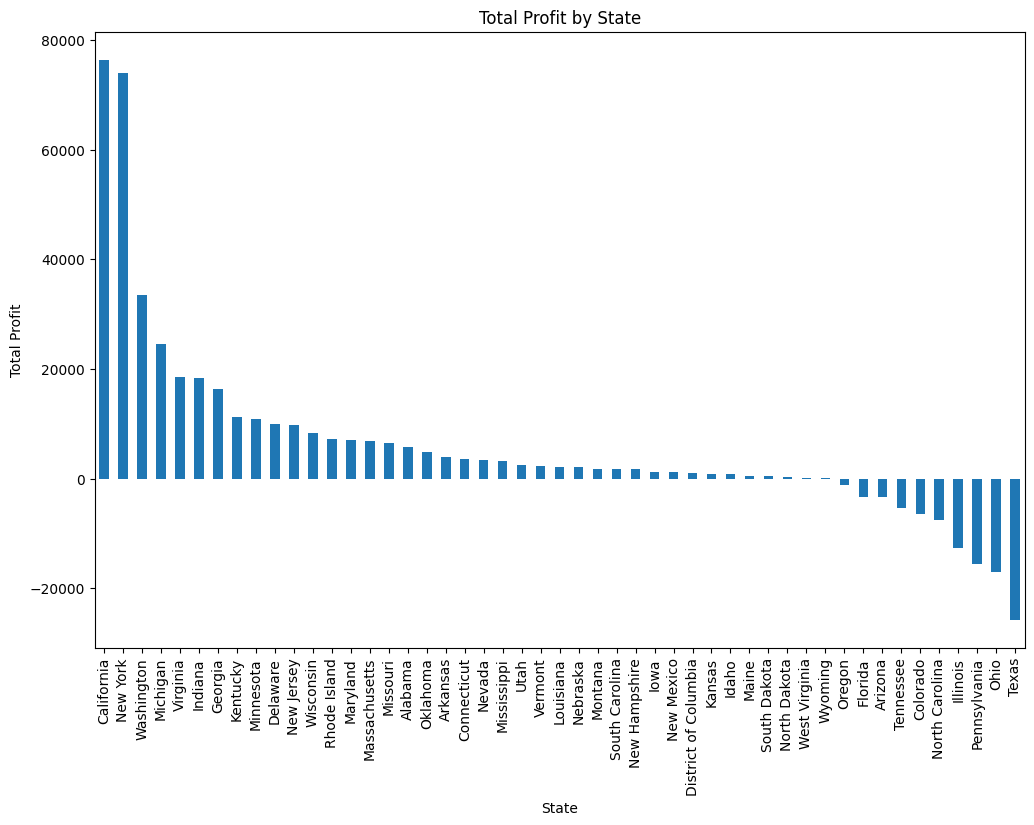

In [10]:
state_profit = data_copy.groupby('State')['Profit'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
state_profit.plot(kind='bar')
plt.title('Total Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

In [11]:

customer_profit = data_copy.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

# Calculate cumulative profit and cumulative percentage of total profit
cumulative_profit = customer_profit.cumsum()
total_profit = customer_profit.sum()
cumulative_percentage = cumulative_profit / total_profit

# Determine the number of customers that make up the top 20%
total_customers = len(customer_profit)
top_20_percent_customers = int(total_customers * 0.2)

# Check if the top 20% of customers contribute to 80% of the profit
top_customers_cumulative_percentage = cumulative_percentage.iloc[top_20_percent_customers - 1]

print(f"The top 20% of customers contribute to {top_customers_cumulative_percentage:.2%} of the total profit.")


The top 20% of customers contribute to 81.43% of the total profit.


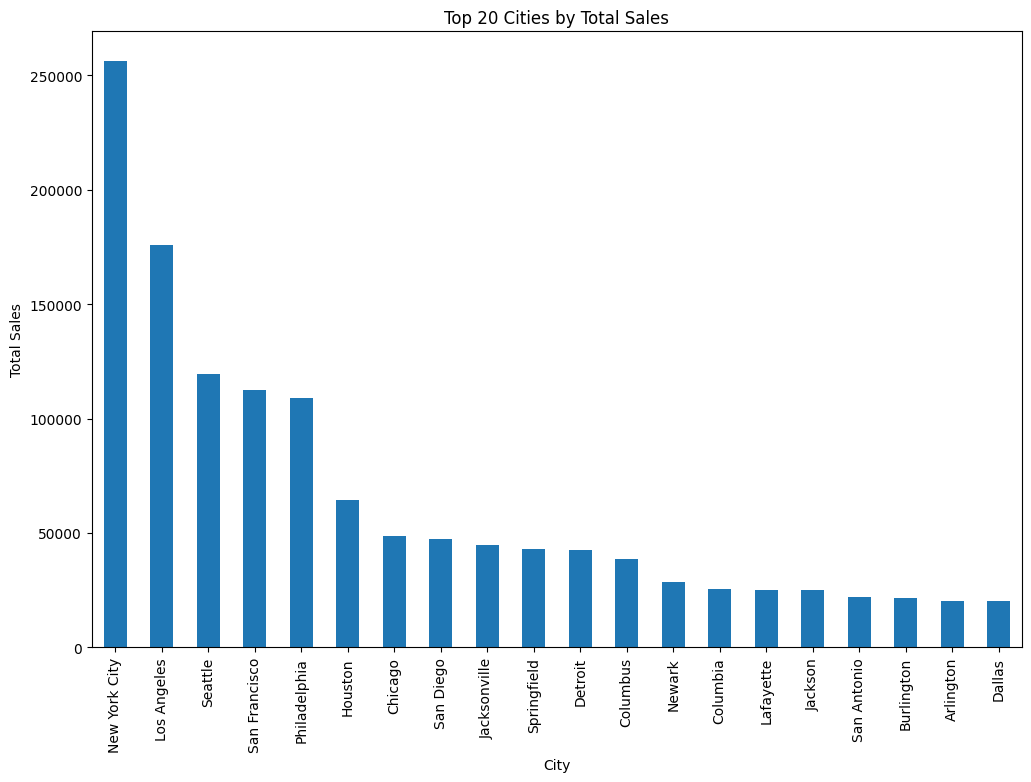

In [12]:
# top 20 city by sales
city_sales = data_copy.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)

# Plot the bar chart for sales
plt.figure(figsize=(12, 8))
city_sales.plot(kind='bar')
plt.title('Top 20 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

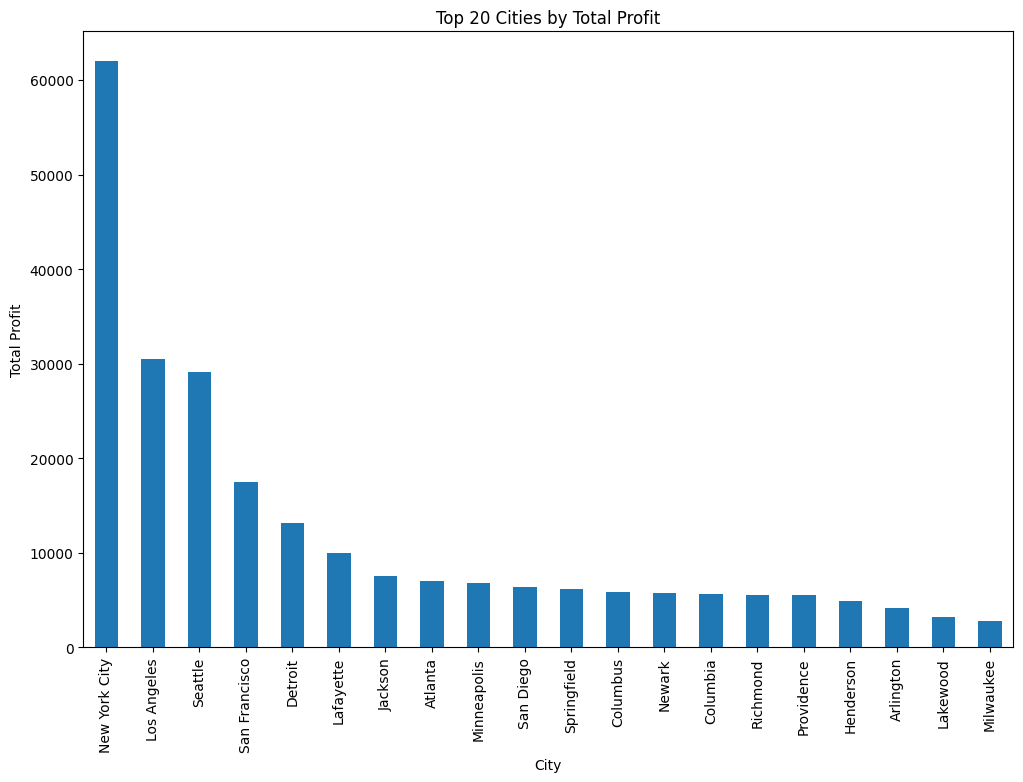

In [14]:
# top 20 city by profit
city_profit = data_copy.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)


plt.figure(figsize=(12, 8))
city_profit.plot(kind='bar')
plt.title('Top 20 Cities by Total Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.show()

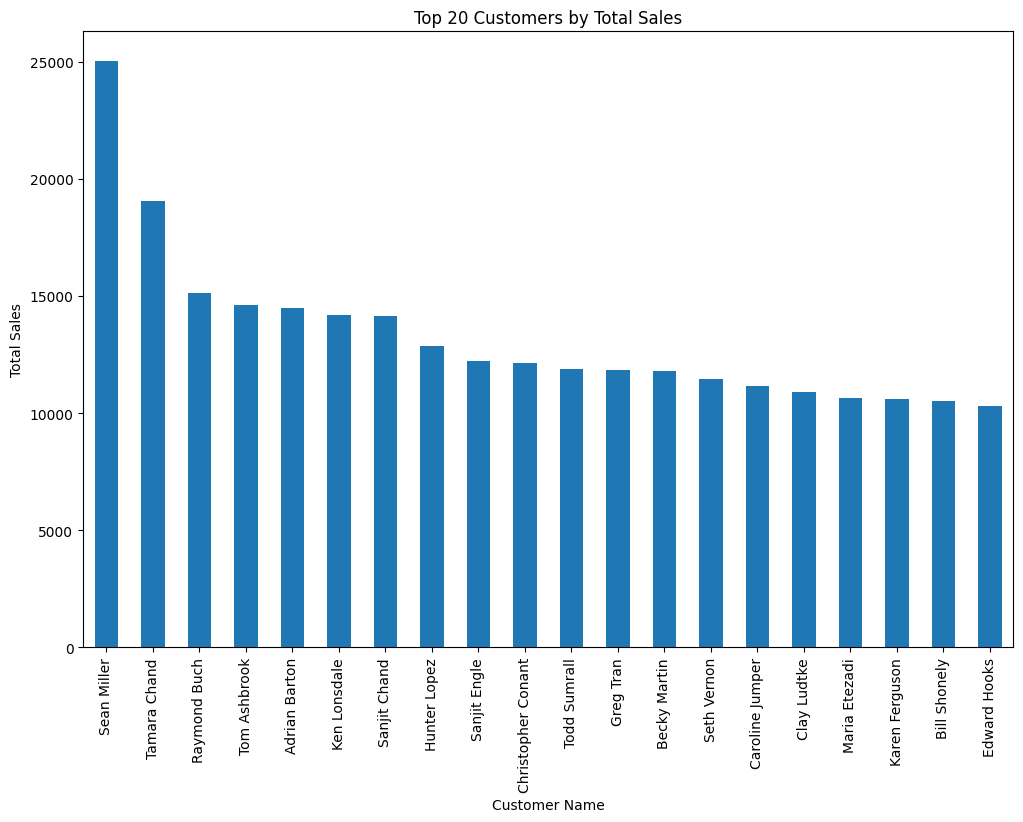

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


In [16]:
#top customers by sales

top_customers_sales = data_copy.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_customers_sales.plot(kind='bar')
plt.title('Top 20 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

print(top_customers_sales)

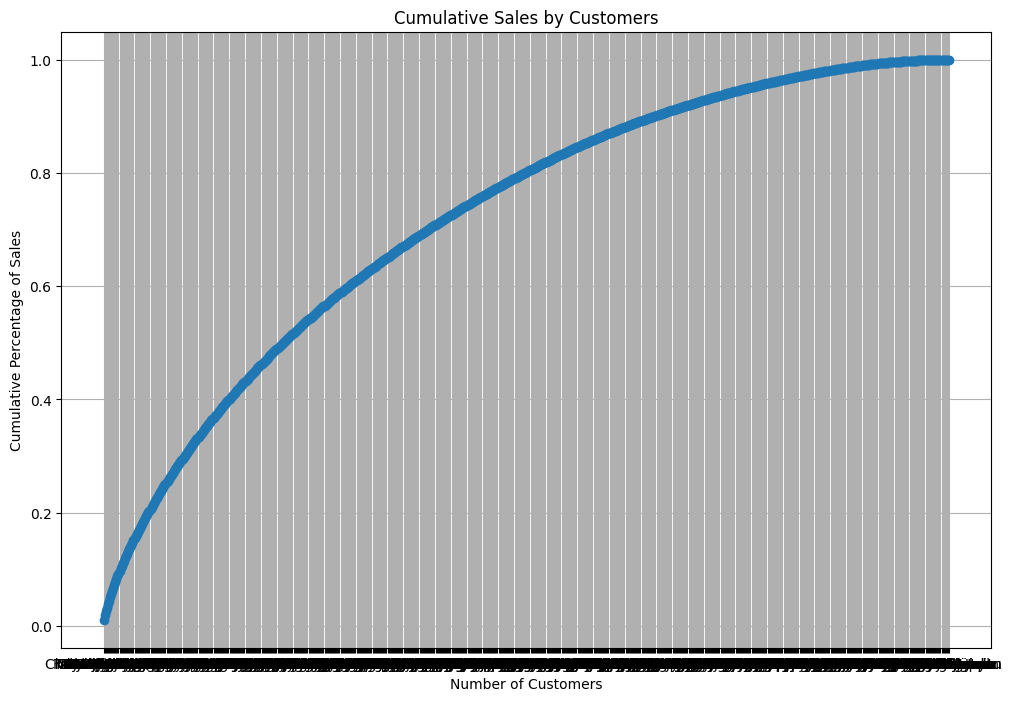

The top 20% of customers contribute to 47.96% of the total sales.


In [17]:



# Calculate total sales for each customer and sort in descending order
customer_sales = data_copy.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative sales and cumulative percentage of total sales
cumulative_sales = customer_sales.cumsum()
total_sales = customer_sales.sum()
cumulative_percentage = cumulative_sales / total_sales

# Plot the cumulative curve
plt.figure(figsize=(12, 8))
plt.plot(cumulative_percentage, marker='o')
plt.title('Cumulative Sales by Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.grid(True)
plt.show()

# Check if the top 20% of customers contribute to 80% of the sales
total_customers = len(customer_sales)
top_20_percent_customers = int(total_customers * 0.2)

# Determine the contribution of the top 20% customers
top_customers_cumulative_percentage = cumulative_percentage.iloc[top_20_percent_customers - 1]

print(f"The top 20% of customers contribute to {top_customers_cumulative_percentage:.2%} of the total sales.")


States to Focus On:

California:
High sales and profit.
Invest in targeted campaigns and promotions.

New York:
High sales and profit.
Focus on personalized marketing and exclusive offers.

Washington:
Significant sales and growing market.
Expand presence with regional advertising and partnerships.

Cities to Focus On:
Los Angeles (CA):
High sales and profit.
Implement targeted digital marketing and local campaigns.

New York City (NY):
Leading city in sales and profit.
Focus on high-impact advertising and VIP customer engagement.

Seatle (Wa):
Strong sales and profit.
Use data-driven marketing and premium customer experiences.

Strategy Summary:
High Sales and Profit: Focus marketing efforts in top states and cities.

Growth Opportunities: Improve profit margins in high-sales areas.